<a href="https://colab.research.google.com/github/YashusRao/UserReviewAnalysis/blob/main/GamingCompanyReviewAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

# Load the Excel file
file_path = '/content/UbisoftReviewsCleaned_EnglishOnly.xlsx'
data = pd.read_excel(file_path)

# Display the first few rows of the dataframe to inspect the data
data.head()
data["ReviewComment"]

0      Absolutely the worst company I have had the di...
1      Tried to buy a game on steam and connect it wi...
2      Locks you out by entering your password wrong ...
3      I have been trying to log into my ubisoft acco...
4      The worst company I have ever had to deal with...
                             ...                        
833    Hello Ubisoft, I am a huge fan of your work. F...
834    NOTE: This is a DEEP review that fully explain...
835    Got a problem with starting Watch Dogs 2. Wrot...
836    To be fair i had multiple problems with accoun...
837    I see a alot of bad reviews? Well haven't had ...
Name: ReviewComment, Length: 838, dtype: object

In [ ]:
# Check for missing values
missing_values = data.isnull().sum()

# Display missing values
missing_values
data["ReviewComment"]


0      Absolutely the worst company I have had the di...
1      Tried to buy a game on steam and connect it wi...
2      Locks you out by entering your password wrong ...
3      I have been trying to log into my ubisoft acco...
4      The worst company I have ever had to deal with...
                             ...                        
833    Hello Ubisoft, I am a huge fan of your work. F...
834    NOTE: This is a DEEP review that fully explain...
835    Got a problem with starting Watch Dogs 2. Wrot...
836    To be fair i had multiple problems with accoun...
837    I see a alot of bad reviews? Well haven't had ...
Name: ReviewComment, Length: 838, dtype: object

In [ ]:
# Fill missing ReviewComment with empty strings
data['ReviewComment'].fillna(' ', inplace=True)

# Fill missing Useful Count with 0
data['Useful Count'].fillna(0, inplace=True)


data.head()
data["ReviewComment"]

0      Absolutely the worst company I have had the di...
1      Tried to buy a game on steam and connect it wi...
2      Locks you out by entering your password wrong ...
3      I have been trying to log into my ubisoft acco...
4      The worst company I have ever had to deal with...
                             ...                        
833    Hello Ubisoft, I am a huge fan of your work. F...
834    NOTE: This is a DEEP review that fully explain...
835    Got a problem with starting Watch Dogs 2. Wrot...
836    To be fair i had multiple problems with accoun...
837    I see a alot of bad reviews? Well haven't had ...
Name: ReviewComment, Length: 838, dtype: object

In [ ]:
# Check for missing values
missing_values = data.isnull().sum()

# Display missing values
missing_values



ReviewerName            0
Date of experience      0
ReviewTitle             0
ReviewRating            0
ReviewComment           0
Location              835
Useful Count            0
Reviews_count           0
Unnamed: 8            838
Unnamed: 9            838
Unnamed: 10           834
dtype: int64

In [ ]:
data.describe()
data["ReviewComment"]

0      Absolutely the worst company I have had the di...
1      Tried to buy a game on steam and connect it wi...
2      Locks you out by entering your password wrong ...
3      I have been trying to log into my ubisoft acco...
4      The worst company I have ever had to deal with...
                             ...                        
833    Hello Ubisoft, I am a huge fan of your work. F...
834    NOTE: This is a DEEP review that fully explain...
835    Got a problem with starting Watch Dogs 2. Wrot...
836    To be fair i had multiple problems with accoun...
837    I see a alot of bad reviews? Well haven't had ...
Name: ReviewComment, Length: 838, dtype: object

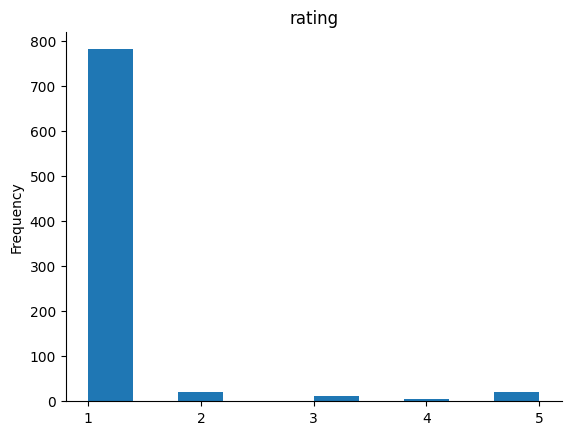

In [ ]:
from matplotlib import pyplot as plt
data['ReviewRating'].plot(kind='hist', bins=10, title='rating')
plt.xticks([1,2,3,4,5])
plt.gca().spines[['top', 'right',]].set_visible(False)

TEXT PREPROCESSING

In [ ]:
data["ReviewComment"]


0      Absolutely the worst company I have had the di...
1      Tried to buy a game on steam and connect it wi...
2      Locks you out by entering your password wrong ...
3      I have been trying to log into my ubisoft acco...
4      The worst company I have ever had to deal with...
                             ...                        
833    Hello Ubisoft, I am a huge fan of your work. F...
834    NOTE: This is a DEEP review that fully explain...
835    Got a problem with starting Watch Dogs 2. Wrot...
836    To be fair i had multiple problems with accoun...
837    I see a alot of bad reviews? Well haven't had ...
Name: ReviewComment, Length: 838, dtype: object

In [ ]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import string

nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')


data['ReviewComment'] = data['ReviewComment'].astype(str).fillna('')

def preprocess_text(text):

    tokens = word_tokenize(text.lower())

    tokens = [token for token in tokens if token not in string.punctuation and token not in stopwords.words('english')]

    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(token) for token in tokens]

    preprocessed_text = ' '.join(tokens)

    return preprocessed_text

data['ReviewCommentText'] = data['ReviewComment'].apply(preprocess_text)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [ ]:
data['ReviewCommentText']


0      absolutely worst company displeasure deal atte...
1      tried buy game steam connect progress console ...
2      lock entering password wrong three four time t...
3      trying log ubisoft account 3 hour 0 star would...
4      worst company ever deal 0 interest customer he...
                             ...                        
833    hello ubisoft huge fan work assassin 's creed ...
834    note deep review fully explains think 're best...
835    got problem starting watch dog 2. wrote ubisof...
836    fair multiple problem account platform one act...
837    see alot bad review well n't problem bought ga...
Name: ReviewCommentText, Length: 838, dtype: object

SENTIMENT ANALYSIS

In [ ]:
!pip install vaderSentiment

from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

sia = SentimentIntensityAnalyzer()

def vader_sentiment(text):
  vader = sia.polarity_scores(text)
  return vader["compound"]

data["vader_sentiment_score"] = data["ReviewCommentText"].apply(vader_sentiment)

data["vader_sentiment_score"]

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 2.7 MB/s eta 0:00:00


0     -0.3018
1      0.8689
2      0.4404
3      0.1531
4      0.4215
        ...  
833    0.9887
834    0.9990
835    0.3400
836    0.3182
837    0.7147
Name: vader_sentiment_score, Length: 838, dtype: float64

In [ ]:
neg_comments = data[data["vader_sentiment_score"] < 0]
pos_comments = data[data["vader_sentiment_score"] > 0]
neutral_comments = data[data["vader_sentiment_score"] == 0]
count_neg = len(neg_comments)
count_pos = len(pos_comments)
count_neutral = len(neutral_comments)
print(count_neg, count_pos, count_neutral)
neg_comments['ReviewComment']

496 315 27


0      Absolutely the worst company I have had the di...
6      Nothing works from the 1st time. To register o...
7      I lost 100 coins = 20% twice when I tried to b...
8      Ive raised multiple concerns with Ubisoft abou...
10     lost all progress in a game, 41h worth, they w...
                             ...                        
811    This company doesn't even make good games anym...
817    Got my account Hijacked today spent over 200+ ...
818    too underrated, most people who write reviews ...
827    Unlike other people here who keeps on posting ...
830    Uplay is not bad it's like steam and other typ...
Name: ReviewComment, Length: 496, dtype: object

In [ ]:
neg_sentences = neg_comments["ReviewComment"].values.tolist()
neg_sentences

['Absolutely the worst company I have had the displeasure to deal with. I attempted 2 separate time to get a subscription for my son (wasting $36), yet never got either subscription to work. It is  impossible to reach any costumer service. If you get a response via email, they don’t answer your questions. You respond back to them for additional help, and you can’t understand what they are saying. They didn’t give me a refund for either subscription, neither of them never worked. Absolutely horrible company!!',
 "Nothing works from the 1st time. To register on app/website and link accounts I had to take like 10 try's. Even after email confirmation I wasn't able to log in multiple times. Had to dance with gods in order for that login to work. Its just so frustrating when any simple thing takes extra steps of bugs and glitches. And I was doing this in order to get to play a game from gamepass that just showed to register on ubisoft. And after all those try's and fails to simply register I

In [ ]:
neg_text = ' '.join(neg_sentences)

In [ ]:
import re

clean_neg_text = re.sub(r'[^\w\s]', '', neg_text)

clean_neg_text = clean_neg_text.lower()

print(type(clean_neg_text))
clean_neg_text

<class 'str'>


'absolutely the worst company i have had the displeasure to deal with i attempted 2 separate time to get a subscription for my son wasting 36 yet never got either subscription to work it is  impossible to reach any costumer service if you get a response via email they dont answer your questions you respond back to them for additional help and you cant understand what they are saying they didnt give me a refund for either subscription neither of them never worked absolutely horrible company nothing works from the 1st time to register on appwebsite and link accounts i had to take like 10 trys even after email confirmation i wasnt able to log in multiple times had to dance with gods in order for that login to work its just so frustrating when any simple thing takes extra steps of bugs and glitches and i was doing this in order to get to play a game from gamepass that just showed to register on ubisoft and after all those trys and fails to simply register i have to find out that the game i

In [ ]:
from nltk.probability import FreqDist
from nltk.corpus import stopwords

words_to_remove = ["get", "every","even", "im","trying","games","company","dont","never","one","ever","cant","time", "ubisoft", "account"]

# Create a regex pattern for the words to remove
pattern = r'\b(?:' + '|'.join(words_to_remove) + r')\b'

# Remove the words from the text
cleaned_text = re.sub(pattern, '', clean_neg_text, flags=re.IGNORECASE)

# Remove extra spaces
cleaned_text = re.sub(r'\s+', ' ', cleaned_text).strip()

wcloud = cleaned_text
tokes = word_tokenize(wcloud)

stop_words = set(stopwords.words("english"))
filtered_tokes = [word for word in tokes if word not in stop_words]

word_freq = FreqDist(filtered_tokes)

word_freq.items()
word_freq_df = pd.DataFrame(list(word_freq.items()), columns = ["Word", "Frequency"])
word_freq_df = word_freq_df.sort_values(by="Frequency", ascending=False)
word_freq_df = word_freq_df.reset_index(drop=True)
throwaway = ["",""]
for word in throwaway:
  word_freq_df = word_freq_df.query("Word != @word")
word_freq_df = word_freq_df.reset_index(drop=True)
word_freq_df.head(30)


,Word,Frequency
0,game,422
1,uplay,146
2,play,133
3,customer,110
4,service,109
5,support,108
6,money,104
7,steam,97
8,buy,93
9,worst,84


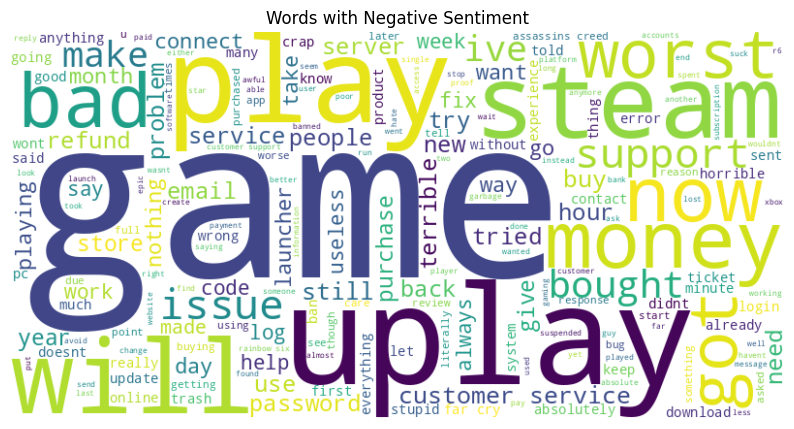

In [ ]:
from wordcloud import WordCloud

wordcloud = WordCloud(width=800, height=400, background_color="white").generate(wcloud)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title("Words with Negative Sentiment")
plt.show()

In [ ]:
senti_rating_corr = data['ReviewRating'].corr(data["vader_sentiment_score"])
senti_rating_corr

0.2253909303974399

In [ ]:
from nltk import ngrams

toks = word_tokenize(clean_neg_text)

def find_instances(text, target_word, proximity_threshold):
  n_grams = list(ngrams(text, proximity_threshold + 1))

  instances = []

  for n_gram in n_grams:
    if target_word in n_gram and n_gram.index(target_word) == proximity_threshold // 2:
      instances.append(n_gram)

  return instances


top_neg_words = word_freq_df["Word"].tolist()

top_neg_words = top_neg_words[:20]
len(top_neg_words)
neg_phrases = []

for neg_word in top_neg_words:
  instances = find_instances(toks, neg_word, 40)
  for instance in instances:
    neg_phrases.append(instance)


for phrase in neg_phrases:
  print(" ".join(phrase))


thing takes extra steps of bugs and glitches and i was doing this in order to get to play a game from gamepass that just showed to register on ubisoft and after all those trys and fails to simply register i
register on ubisoft and after all those trys and fails to simply register i have to find out that the game i was doing all this hustle for wasnt even free and i need to pay additional 15 euros a month
ubisoft account right after finishing this review i lost 100 coins 20 twice when i tried to buy a the game ac mirage on ubisoft connect when the payment should be completed i got a popup window that wasnt able to
customer for 6 years now but whos even counting ive raised multiple concerns with ubisoft about misogynistic abuse on the game and males reporting me etc because i am female with no response they do not carethey have issues penalties etc
when i have multiple screen records and captures of the bullying and abuse disgusting company lost all progress in a game 41h worth they were